In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [52]:
import numpy as np
from numpy.random import seed, randn
import matplotlib
from matplotlib import pyplot as plt


def prepare_data(n, pos_rate=0.9):
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((randn(pos_num) - 2, randn(neg_num) + 2)), 2 * randn(n)])\
        .transpose((1, 0))
    y = np.concatenate((np.ones(pos_num), -1 * np.ones(neg_num)))
    return X, y


def main():
    train_X, train_y = prepare_data(100, 0.9)
    X, y = prepare_data(100, 0.1)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[train_y == 1, 0], train_X[train_y == 1, 1], 'bo')
    ax1.plot(train_X[train_y == -1, 0], train_X[train_y == -1, 1], 'rx')
    p = np.linspace(-5, 5)
    ax1.plot(p, b - p * w[0] / w[1])
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[y == 1, 0], X[y == 1, 1], 'bo')
    ax2.plot(X[y == -1, 0], X[y == -1, 1], 'rx')
    p = np.linspace(-5, 5)
    ax2.plot(p, b - p * w[0] / w[1])
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


In [55]:
p_rs = np.random.RandomState(15)
# theta = p_rs.normal(0, 0.01, n)
n = 100
theta = np.zeros(n)
b = 0
train_X, y = prepare_data(n)
X = train_X.T

def f_th(x):
    global theta, b, X
    return x @ X @ theta + b

def sub_diff(i, k):
    """Sub-differentiate by k_th theta"""
    global theta, b, X, y
    if 1 - y[i] * f_th(X[:, i]) > 0:
        return - y[i] * np.matmul(X[:, k], X[:, i])
    else:
        return 0
    
def sub_diff_b(i):
    """Sub-differentiate by b"""
    global theta, b, X, y
    if 1 - y[i] * f_th(X[:, i]) > 0:
        return - y[i]
    else:
        return 0
    
def update_theta(k, lamb=0.01):
    """Return update for k_th theta"""
    global theta, n
    val = lamb * theta[k]
    for i in range(n):
        val += sub_diff(i, k)
    return val

def update_b():
    """Return update for b"""
    global n
    val = 0
    for i in range(n):
        val += sub_diff_b(i)
    return val
        
iter_num = 1000
for l in range(iter_num):
    if l % 50 == 0:
        print(l, X @ theta)
    eps = 0.1
    new_theta = np.copy(theta)
    for i, t in enumerate(theta):
        new_theta[i] -= eps * update_theta(i)
    b -= eps * update_b()
    theta = new_theta
    
w = X @ theta    
print(w)

0 [ 0.  0.]
50 [-10621.49229372   1067.53339052]
100 [-10103.22324963   1015.44376935]
150 [-9610.24281798   965.89582852]
200 [-9141.31705681   918.76554834]
250 [-8695.27223357   873.93496058]
300 [-8270.99188727   831.29185318]
350 [-7867.41403395   790.72948942]
400 [-7483.52850845   752.14634072]
450 [-7118.37443601   715.44583252]
500 [-6771.03782714   680.53610256]
550 [-6440.64928991   647.32977095]
600 [-6126.38185381   615.74372142]
650 [-5827.44889983   585.69889335]
700 [-5543.10219155   557.12008378]
750 [-5272.63000227   529.93575927]
800 [-5015.35533356   504.0778768 ]
850 [-4770.63422069   479.48171346]
900 [-4537.85412079   456.08570446]
950 [-4316.43237963   433.83128903]
[-4105.81477324   412.66276381]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


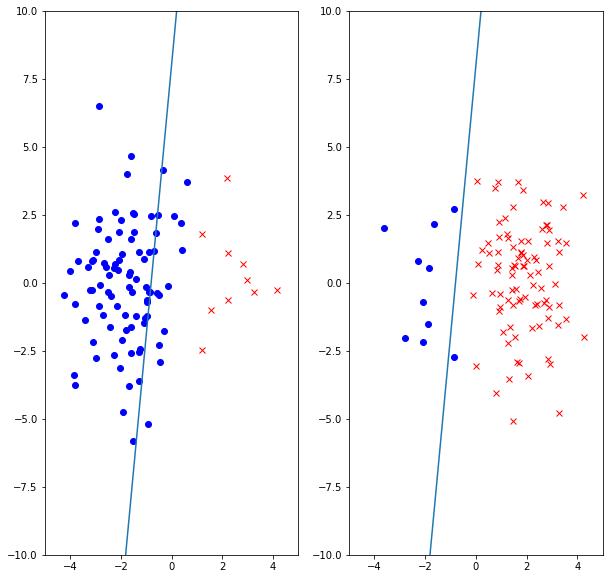

In [56]:
main()

In [15]:
a = np.array([1,3])
b = np.array([7,2])
a.T @ b

13

In [7]:
c = np.copy(a)

In [10]:
print(c)
a[0] = 100
print(c)

[1 3]
[1 3]


In [12]:
d = a

In [13]:
print(d)
a = [2, 90]
print(d)

[100   3]
[100   3]


In [14]:
a

[2, 90]

In [52]:
import numpy as np
from numpy.random import seed, randn
import matplotlib
from matplotlib import pyplot as plt


def prepare_data(n, pos_rate=0.9):
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((randn(pos_num) - 2, randn(neg_num) + 2)), 2 * randn(n)])
    y = np.concatenate((np.ones(pos_num), 2 * np.ones(neg_num)))
    return X, y


def main():
    train_X, train_y = prepare_data(100, 0.9)
    X, y = prepare_data(100, 0.1)
    print(train_X.shape, train_y.shape)

    line_sep = LineSeparator(train_X, train_y)
    w, b = line_sep.train()
    print(w.shape, b.shape)
    print(b)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == 2], train_X[1, train_y == 2], 'rx')
    ax1.plot(line_points, - (b + line_points * w[0]) / w[1])
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == 2], X[1, y == 2], 'rx')
    ax2.plot(line_points, - (b + line_points * w[0]) / w[1])
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


class LineSeparator:
    EPOCHS = 100

    def __init__(self, X, y, learning_rate=0.1, regularize=1.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._X = X
        self._y = y
        self._data_num = y.shape[0]

        self._rs = np.random.RandomState(42)
        self._thetas = np.zeros(self._data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self):
        for epoch in range(self.EPOCHS):
            # Show log
            if epoch % 50 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data_num):
                    update += self._subdiff_theta(j, k)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._X.T @ self._X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %f\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._y[i] * self._f(X[:, i]) > 0:
            return - self._y[i] * self._X[:, k] @ self._X[:, i]
        else:
            return 0

    def _subdiff_b(self, i):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._y[i] * self._f(X[:, i]) > 0:
            return - self._y[i]
        else:
            return 0


(2, 100) (100,)
Epoch 0:
   w1: 0.000000
   w2: 0.000000

Epoch 50:
   w1: 536989020609365231244961353070909455906333563841753429037648293858481162870608363520000.000000
   w2: -56360756502775846056432565404529707664727025924728632547793858837212963258469644763136.000000

Finally:
   w1: 1990123304758213666332282343696857705229758981936675787387413381215686401685668782852743006080487265678186475451804574022491496044135878695010451008103242988051011377037312.000000
   w2: -208876447177758005108275030671730476023665526315882238057417477958212000318899168844250817303015425987740463787642658540454695501167267948467854702112446415706761262530560.000000
   b: 550.000000

(2,) ()
550.0


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


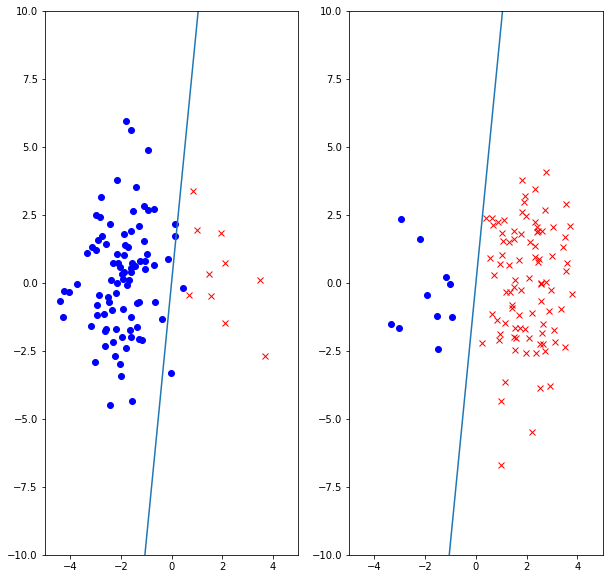

In [53]:
main()

In [60]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), -1 * np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(42)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1)

    line_sep = LineSeparator(train_X, train_y)
    w, b = line_sep.train(200)
    print(w.shape, b.shape)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (b + line_points * w[0]) / w[1])
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (b + line_points * w[0]) / w[1])
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


class LineSeparator:
    def __init__(self, X, y, learning_rate=0.01, regularize=1.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._X = X
        self._y = y
        self._data_num = y.shape[0]

        self._rs = np.random.RandomState(42)
        self._thetas = np.zeros(self._data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, epochs=100):
        for epoch in range(epochs):
            # Show log
            if epoch % 50 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data_num):
                    update += self._subdiff_theta(j, k)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._X.T @ self._X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %f\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._y[i] * self._f(X[:, i]) > 0:
            return - self._y[i] * self._X[:, k] @ self._X[:, i]
        else:
            return 0

    def _subdiff_b(self, i):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._y[i] * self._f(X[:, i]) > 0:
            return - self._y[i]
        else:
            return 0


Epoch 0:
   w1: 0.000000
   w2: 0.000000

Epoch 50:
   w1: 7385050944522402249036858027671552.000000
   w2: -2129764719527866948671434221682688.000000

Epoch 100:
   w1: 221291636374205990095919605366173746508658791268620395197660921856.000000
   w2: -63817991699383962615955035814001060384710525454720652777621553152.000000

Epoch 150:
   w1: 6630961478404015334230678740374035120579236221053501120847859119638239573789765822999770083360768.000000
   w2: -1912293891993868469342540557063034600976204625483273384404053970930210404361942686729391453503488.000000

Finally:
   w1: 198695490026224573145200301319293975096239755942389432443620183873654933839550285336027961438055703098929479400492531856133062656.000000
   w2: -57301520025619316653735945734765063158437019768355197035250525992780858326751807687959499044581811087037526023485708396876791808.000000
   b: 79.990000

(2,) ()


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


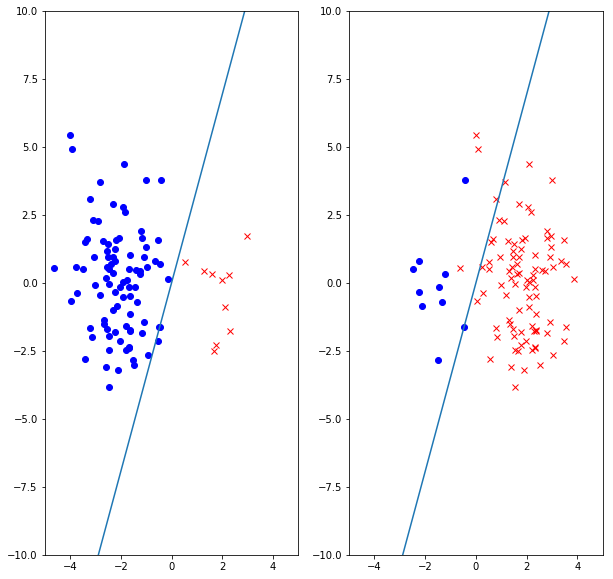

In [61]:
main()

In [20]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


class LineSeparator:
    def __init__(self, X, y, learning_rate=0.01, regularize=1.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._X = X
        self._y = y
        self._data_num = y.shape[0]

        self._thetas = np.zeros(self._data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, epochs=100):
        for epoch in range(epochs):
            # Show log
            if epoch % 50 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data_num):
                    update += self._subdiff_theta(j, k)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._X.T @ self._X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %e\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._y[i] * self._f(self._X[:, i]) > 0:
            return - self._y[i] * self._X[:, k] @ self._X[:, i]
        else:
            return 0

    def _subdiff_b(self, i):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._y[i] * self._f(self._X[:, i]) > 0:
            return - self._y[i]
        else:
            return 0


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), - np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(42)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1)

    train_line_sep = LineSeparator(train_X, train_y)
    test_line_sep = LineSeparator(X, y)

    tr_w, tr_b = train_line_sep.train(200)
    w, b = test_line_sep.train(200)
    print(w.shape, b.shape)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax1.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax2.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 50:
   w1: 7.621709e+33
   w2: -2.198014e+33

Epoch 100:
   w1: 2.283830e+65
   w2: -6.586307e+64

Epoch 150:
   w1: 6.843454e+96
   w2: -1.973574e+96

Finally:
   w1: 2.050628e+128
   w2: -5.913778e+127
   b: 79.980000

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 50:
   w1: 6.639915e+26
   w2: -1.533781e+26

Epoch 100:
   w1: 1.743907e+51
   w2: -4.029044e+50

Epoch 150:
   w1: 4.580237e+75
   w2: -1.058198e+75

Finally:
   w1: 1.202964e+100
   w2: -2.779275e+99
   b: -79.980000

(2,) ()


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


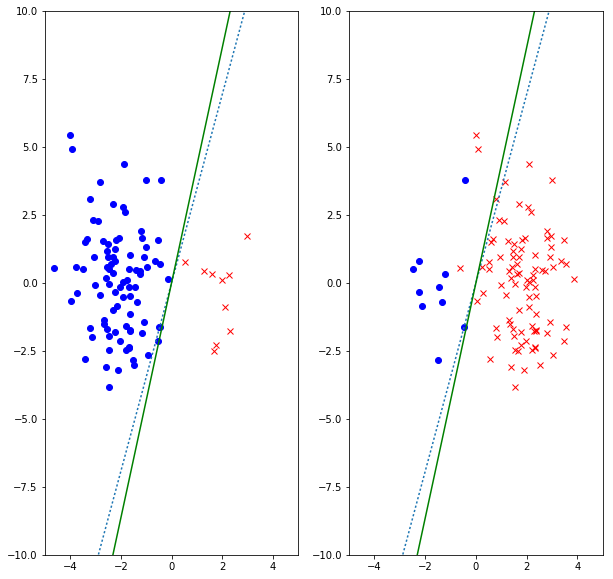

In [21]:
main()

In [38]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


class LineSeparator:
    def __init__(self, X, y, learning_rate=0.00001, regularize=100.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._X = X
        self._y = y
        self._data_num = y.shape[0]

        self._thetas = np.zeros(self._data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, epochs=100):
        for epoch in range(epochs):
            # Show log
            if epoch % 100 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data_num):
                    update += self._subdiff_theta(j, k)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._X.T @ self._X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %e\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._y[i] * self._f(self._X[:, i]) > 0:
            return - self._y[i] * self._X[:, k] @ self._X[:, i]
        else:
            return 0

    def _subdiff_b(self, i):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._y[i] * self._f(self._X[:, i]) > 0:
            return - self._y[i]
        else:
            return 0


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), - np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(42)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1, rs)

    train_line_sep = LineSeparator(train_X, train_y)
    test_line_sep = LineSeparator(X, y)

    tr_w, tr_b = train_line_sep.train(500)
    w, b = test_line_sep.train(500)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax1.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax2.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 50:
   w1: 2.009343e+136
   w2: -5.794718e+135

Finally:
   w1: 2.070117e+272
   w2: -5.969981e+271
   b: 39.990000

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 50:
   w1: 1.592677e+135
   w2: 3.018703e+134

Finally:
   w1: 1.328225e+270
   w2: 2.517472e+269
   b: -40.000000



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


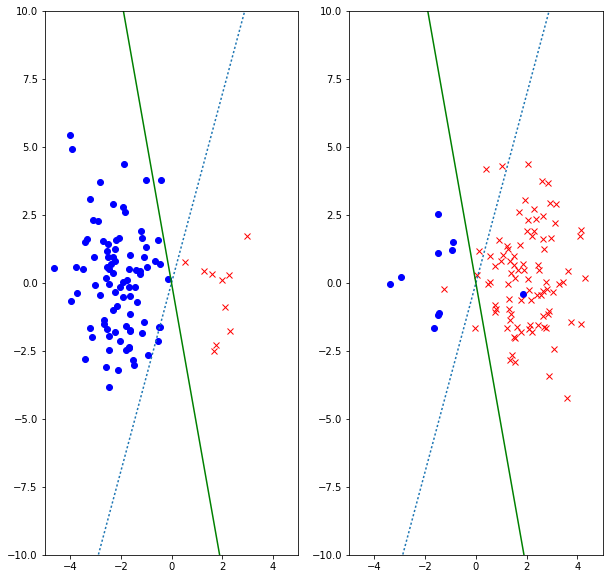

In [31]:
main()

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 50:
   w1: -5.346487e-01
   w2: -6.201467e-04

Epoch 100:
   w1: -5.395057e-01
   w2: -5.323141e-03

Epoch 150:
   w1: -5.522905e-01
   w2: -1.044294e-03

Epoch 200:
   w1: -5.436617e-01
   w2: 6.611738e-03

Epoch 250:
   w1: -5.394687e-01
   w2: 9.563420e-03

Epoch 300:
   w1: -5.398735e-01
   w2: 9.205451e-03

Epoch 350:
   w1: -5.581621e-01
   w2: 1.495090e-02

Epoch 400:
   w1: -5.729696e-01
   w2: 2.121031e-02

Epoch 450:
   w1: -5.562240e-01
   w2: -1.254693e-02

Finally:
   w1: -5.621072e-01
   w2: 2.295432e-02
   b: 0.144100

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 50:
   w1: -5.231900e-01
   w2: 1.655659e-02

Epoch 100:
   w1: -5.091193e-01
   w2: 1.643866e-02

Epoch 150:
   w1: -5.276382e-01
   w2: 7.705701e-03

Epoch 200:
   w1: -5.014884e-01
   w2: 1.792945e-02

Epoch 250:
   w1: -5.011963e-01
   w2: 1.015000e-02

Epoch 300:
   w1: -4.998208e-01
   w2: 1.332856e-02

Epoch 350:
   w1: -4.894215e-01
   w2

/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


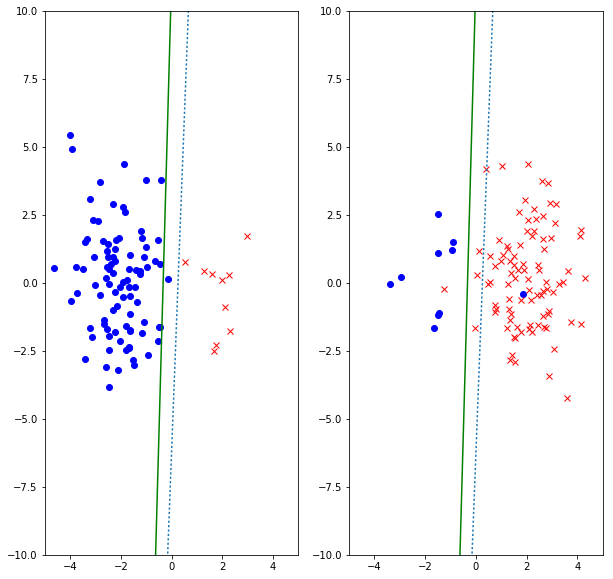

In [37]:
main()

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -8.902600e-01
   w2: 2.460712e-02

Epoch 200:
   w1: -8.834768e-01
   w2: 1.995500e-02

Epoch 300:
   w1: -8.758886e-01
   w2: 3.099256e-02

Epoch 400:
   w1: -8.659199e-01
   w2: 2.156875e-02

Finally:
   w1: -8.591812e-01
   w2: 2.337445e-02
   b: 0.057690

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -8.603862e-01
   w2: -5.736741e-02

Epoch 200:
   w1: -8.461430e-01
   w2: -6.081362e-02

Epoch 300:
   w1: -8.353395e-01
   w2: -6.288504e-02

Epoch 400:
   w1: -8.271792e-01
   w2: -6.145881e-02

Finally:
   w1: -8.243379e-01
   w2: -4.949689e-02
   b: -0.065400



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


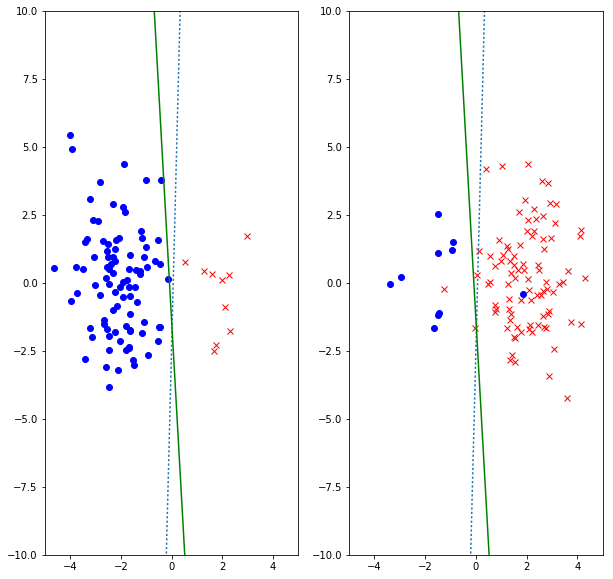

In [39]:
main()

In [40]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


class LineSeparator:
    def __init__(self, X, y, learning_rate=0.00001, regularize=100.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._X = X
        self._y = y
        self._data_num = y.shape[0]

        self._thetas = np.zeros(self._data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, epochs=150):
        for epoch in range(epochs):
            # Show log
            if epoch % 100 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data_num):
                    update += self._subdiff_theta(j, k)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._X.T @ self._X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %e\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._y[i] * self._f(self._X[:, i]) > 0:
            return - self._y[i] * self._X[:, k] @ self._X[:, i]
        else:
            return 0

    def _subdiff_b(self, i):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._y[i] * self._f(self._X[:, i]) > 0:
            return - self._y[i]
        else:
            return 0


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), - np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(42)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1, rs)

    train_line_sep = LineSeparator(train_X, train_y)
    test_line_sep = LineSeparator(X, y)

    tr_w, tr_b = train_line_sep.train(500)
    w, b = test_line_sep.train(500)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax1.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax2.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -5.395057e-01
   w2: -5.323141e-03

Epoch 200:
   w1: -5.436617e-01
   w2: 6.611738e-03

Epoch 300:
   w1: -5.398735e-01
   w2: 9.205451e-03

Epoch 400:
   w1: -5.729696e-01
   w2: 2.121031e-02

Finally:
   w1: -5.621072e-01
   w2: 2.295432e-02
   b: 0.144100

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -5.091193e-01
   w2: 1.643866e-02

Epoch 200:
   w1: -5.014884e-01
   w2: 1.792945e-02

Epoch 300:
   w1: -4.998208e-01
   w2: 1.332856e-02

Epoch 400:
   w1: -4.881928e-01
   w2: 1.772076e-02

Finally:
   w1: -4.806515e-01
   w2: 1.428064e-02
   b: -0.158920



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


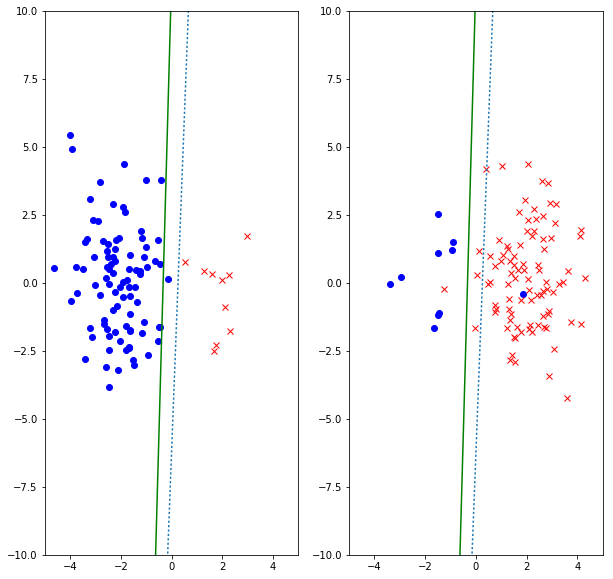

In [41]:
main()

In [44]:
a = np.arange(10).reshape((10, 1))
print(a)
print(np.tile(a, 3))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]


## Class Balance Estimation

In [62]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


class LineSeparator:
    def __init__(self, data, learning_rate=0.00001, regularize=100.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._data = data

        self._thetas = np.zeros(self._data.data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, epochs=150):
        for epoch in range(epochs):
            # Show log
            if epoch % 100 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data.data_num):
                    update += self._subdiff_theta(j, k)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._data.train_X.T @ self._data.train_X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data.data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._data.train_X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %e\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._data.train_X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._data.train_y[i] * self._f(self._data.train_X[:, i]) > 0:
            return - self._data.train_y[i] * self._data.train_X[:, k] @ self._data.train_X[:, i] * self._data.importance(self._data.train_y[i])
        else:
            return 0

    def _subdiff_b(self, i):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._data.train_y[i] * self._f(self._data.train_X[:, i]) > 0:
            return - self._data.train_y[i] * self._data.importance(self._data.train_y[i])
        else:
            return 0


class ClassBalanceEstimater:
    def __init__(self, train_X, train_y, test_X):
        self._X = train_X
        self._y = train_y
        self._test_X = test_X
        self._pi = self._calc_pi()

    @property
    def train_X(self):
        return self._X

    @property
    def train_y(self):
        return self._y

    @property
    def test_X(self):
        return self._test_X

    @property
    def data_num(self):
        return self._X.shape[1]

    def importance(self, label):
        if label == 1:
            return self._pi
        else:
            return 1 - self._pi

    def _calc_pi(self):
        numerator = self._A(1, -1) - self._A(-1, -1) - self._b(1) + self._b(-1)
        denominator = 2 * self._A(1, -1) - self._A(1, 1) - self._A(-1, -1)
        return numerator / denominator

    def _tile_square(self, X, cols):
        """
        Align X^2 colum-wise
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        Returns: [[x0^2, x0^2, ...], [x1^2, x1^2, ...], ...]
        """
        sq = np.square(X[0, :]) + np.square(X[1, :])
        sq = sq.reshape([X.shape[1], 1])
        return np.tile(sq, cols)

    def _dist_matrix(self, X0, X1):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        Returns: [[||X0_0 - X1_0||, ||X0_0 - X1_1||, ...], ...]
        """
        X0_sq = self._tile_square(X0, X1.shape[1])
        X1_sq = self._tile_square(X1, X0.shape[1])
        return np.sqrt(X0_sq + X1_sq.T - 2 * X0.T @ X1)

    def _A(self, y0, y1):
        X0 = self._X[:, self._y == y0]
        X1 = self._X[:, self._y == y1]
        n0 = X0.shape[1]
        n1 = X1.shape[1]
        return np.sum(self._dist_matrix(X0, X1)) / (n0 * n1)

    def _b(self, y):
        X = self._X[:, self._y == y]
        n = X.shape[1]
        n_test = self._test_X.shape[1]
        return np.sum(self._dist_matrix(self._test_X, X)) / (n * n_test)


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), - np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(18)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1, rs)

    class_balance_estimater = ClassBalanceEstimater(train_X, train_y, X)
    train_line_sep = LineSeparator(class_balance_estimater)
    # test_line_sep = LineSeparator(X, y)

    tr_w, tr_b = train_line_sep.train(500)
    # w, b = test_line_sep.train(500)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    # ax1.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    # ax2.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -3.317664e-01
   w2: 1.655780e-02

Epoch 200:
   w1: -3.310021e-01
   w2: 1.657328e-02

Epoch 300:
   w1: -3.327863e-01
   w2: 1.674428e-02

Epoch 400:
   w1: -3.309634e-01
   w2: 1.659609e-02

Finally:
   w1: -3.305639e-01
   w2: 1.662219e-02
   b: 0.005310



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


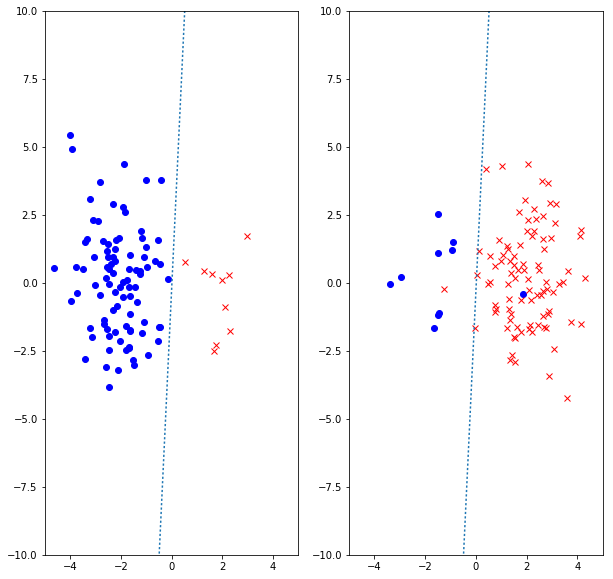

In [61]:
main()

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -3.152986e-01
   w2: 1.779184e-03

Epoch 200:
   w1: -3.128376e-01
   w2: 1.954019e-04

Epoch 300:
   w1: -3.128376e-01
   w2: 1.954019e-04

Epoch 400:
   w1: -3.128376e-01
   w2: 1.954019e-04

Finally:
   w1: -3.099224e-01
   w2: 4.791683e-04
   b: 0.030104



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


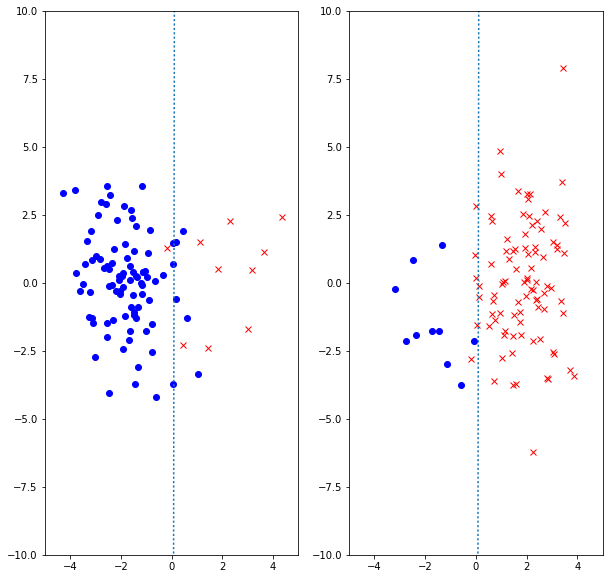

In [63]:
main()

In [68]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


class LineSeparator:
    def __init__(self, data, learning_rate=0.00001, regularize=100.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._data = data

        self._thetas = np.zeros(self._data.data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, compensate_class_balance=False, epochs=150):
        for epoch in range(epochs):
            # Show log
            if epoch % 100 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data.data_num):
                    update += self._subdiff_theta(j, k, compensate_class_balance)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._data.train_X.T @ self._data.train_X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data.data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j, compensate_class_balance)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._data.train_X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %e\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._data.train_X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k, compensate_class_balance=False):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._data.train_y[i] * self._f(self._data.train_X[:, i]) > 0:
            if compensate_class_balance:
                return - self._data.train_y[i] * self._data.train_X[:, k] @ self._data.train_X[:, i] * self._data.importance(self._data.train_y[i])
            else:
                return - self._data.train_y[i] * self._data.train_X[:, k] @ self._data.train_X[:, i]
        else:
            return 0

    def _subdiff_b(self, i, compensate_class_balance=False):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._data.train_y[i] * self._f(self._data.train_X[:, i]) > 0:
            if compensate_class_balance:
                return - self._data.train_y[i] * self._data.importance(self._data.train_y[i])
            else:
                return - self._data.train_y[i]
        else:
            return 0


class ClassBalanceEstimater:
    def __init__(self, train_X, train_y, test_X):
        self._X = train_X
        self._y = train_y
        self._test_X = test_X
        self._pi = self._calc_pi()

    @property
    def train_X(self):
        return self._X

    @property
    def train_y(self):
        return self._y

    @property
    def test_X(self):
        return self._test_X

    @property
    def data_num(self):
        return self._X.shape[1]

    def importance(self, label):
        if label == 1:
            return self._pi
        else:
            return 1 - self._pi

    def _calc_pi(self):
        numerator = self._A(1, -1) - self._A(-1, -1) - self._b(1) + self._b(-1)
        denominator = 2 * self._A(1, -1) - self._A(1, 1) - self._A(-1, -1)
        return numerator / denominator

    def _tile_square(self, X, cols):
        """
        Align X^2 colum-wise
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        Returns: [[x0^2, x0^2, ...], [x1^2, x1^2, ...], ...]
        """
        sq = np.square(X[0, :]) + np.square(X[1, :])
        sq = sq.reshape([X.shape[1], 1])
        return np.tile(sq, cols)

    def _dist_matrix(self, X0, X1):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        Returns: [[||X0_0 - X1_0||, ||X0_0 - X1_1||, ...], ...]
        """
        X0_sq = self._tile_square(X0, X1.shape[1])
        X1_sq = self._tile_square(X1, X0.shape[1])
        return np.sqrt(X0_sq + X1_sq.T - 2 * X0.T @ X1)

    def _A(self, y0, y1):
        X0 = self._X[:, self._y == y0]
        X1 = self._X[:, self._y == y1]
        n0 = X0.shape[1]
        n1 = X1.shape[1]
        return np.sum(self._dist_matrix(X0, X1)) / (n0 * n1)

    def _b(self, y):
        X = self._X[:, self._y == y]
        n = X.shape[1]
        n_test = self._test_X.shape[1]
        return np.sum(self._dist_matrix(self._test_X, X)) / (n * n_test)


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), - np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(42)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1, rs)

    class_balance_estimater = ClassBalanceEstimater(train_X, train_y, X)
    line_sep = LineSeparator(class_balance_estimater)
    # test_line_sep = LineSeparator(X, y)

    tr_w, tr_b = line_sep.train(epochs=500)
    real_w, real_b = line_sep.train(compensate_class_balance=True, epochs=500)
    # w, b = test_line_sep.train(500)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax1.plot(line_points, - (real_b + line_points * real_w[0]) / real_w[1], ':')
    # ax1.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], ':')
    ax2.plot(line_points, - (real_b + line_points * real_w[0]) / real_w[1], ':')
    # ax2.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 100:
   w1: -5.395057e-01
   w2: -5.323141e-03

Epoch 200:
   w1: -5.436617e-01
   w2: 6.611738e-03

Epoch 300:
   w1: -5.398735e-01
   w2: 9.205451e-03

Epoch 400:
   w1: -5.729696e-01
   w2: 2.121031e-02

Finally:
   w1: -5.621072e-01
   w2: 2.295432e-02
   b: 0.144100

Epoch 0:
   w1: -5.621072e-01
   w2: 2.295432e-02

Epoch 100:
   w1: -3.230198e-01
   w2: 1.517431e-02

Epoch 200:
   w1: -3.230198e-01
   w2: 1.517431e-02

Epoch 300:
   w1: -3.230198e-01
   w2: 1.517431e-02

Epoch 400:
   w1: -3.230198e-01
   w2: 1.517431e-02

Finally:
   w1: -3.230198e-01
   w2: 1.517431e-02
   b: 0.147794



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


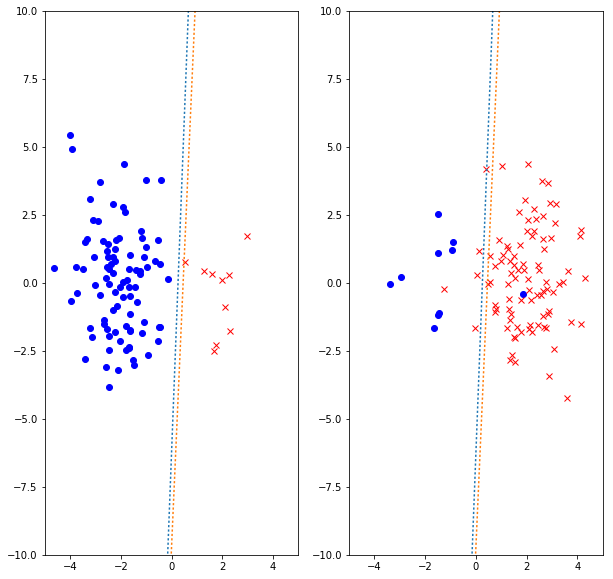

In [69]:
main()

In [78]:
import numpy as np
from numpy.random import seed, randn, RandomState
import matplotlib
from matplotlib import pyplot as plt


class LineSeparator:
    def __init__(self, data, learning_rate=0.00001, regularize=100.):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._data = data

        self._thetas = np.zeros(self._data.data_num)
        self._bias = 0
        self._learning_rate = learning_rate
        self._lambda = regularize

    def train(self, compensate_class_balance=False, epochs=150):
        for epoch in range(epochs):
            # Show log
            if epoch % 200 == 0:
                self._pretty_print(epoch, self.omega)

            # Updata thetas
            new_thetas = np.copy(self._thetas)
            for k, _ in enumerate(self._thetas):
                update = 0
                for j in range(self._data.data_num):
                    update += self._subdiff_theta(j, k, compensate_class_balance)
                new_thetas[k] -= self._learning_rate * update
            new_thetas -= self._learning_rate * self._lambda * self._data.train_X.T @ self._data.train_X @ self._thetas
            self._thetas = new_thetas

            # Updata b
            for j in range(self._data.data_num):
                self._bias -= self._learning_rate * self._subdiff_b(j, compensate_class_balance)

        w = self.omega
        self._pretty_print(None, w, bias=self._bias)
        return w, self._bias

    @property
    def omega(self):
        """
        omega = sum theta_j psi(x_j)
        """
        return self._data.train_X @ self._thetas

    @property
    def b(self):
        return self._bias

    def _pretty_print(self, epoch, omegas, bias=None):
        if epoch is None:
            log = "Finally:\n"
        else:
            log = "Epoch %d:\n" % epoch

        for i, omega in enumerate(omegas):
            log += "   w%d: %e\n" % (i + 1, omega)

        if bias is not None:
            log += "   b: %f\n" % bias

        print(log)

    def _f(self, x):
        """
        x: [x[0], x[1]]
        Returns: f_theta(x) = w x + b
        """
        return x.T @ self._data.train_X @ self._thetas + self._bias

    def _subdiff_theta(self, i, k, compensate_class_balance=False):
        """
        i-th subdifferentiation by k_th theta
        """
        if 1 - self._data.train_y[i] * self._f(self._data.train_X[:, i]) > 0:
            if compensate_class_balance:
                return - self._data.train_y[i] * self._data.train_X[:, k] @ self._data.train_X[:, i] * self._data.importance(self._data.train_y[i])
            else:
                return - self._data.train_y[i] * self._data.train_X[:, k] @ self._data.train_X[:, i]
        else:
            return 0

    def _subdiff_b(self, i, compensate_class_balance=False):
        """
        i-th subdifferentiate by b
        """
        if 1 - self._data.train_y[i] * self._f(self._data.train_X[:, i]) > 0:
            if compensate_class_balance:
                return - self._data.train_y[i] * self._data.importance(self._data.train_y[i])
            else:
                return - self._data.train_y[i]
        else:
            return 0


class ClassBalanceEstimater:
    def __init__(self, train_X, train_y, test_X):
        self._X = train_X
        self._y = train_y
        self._test_X = test_X
        self._pi = self._calc_pi()

    @property
    def train_X(self):
        return self._X

    @property
    def train_y(self):
        return self._y

    @property
    def test_X(self):
        return self._test_X

    @property
    def data_num(self):
        return self._X.shape[1]

    def importance(self, label):
        if label == 1:
            return self._pi
        else:
            return 1 - self._pi

    def _calc_pi(self):
        numerator = self._A(1, -1) - self._A(-1, -1) - self._b(1) + self._b(-1)
        denominator = 2 * self._A(1, -1) - self._A(1, 1) - self._A(-1, -1)
        return numerator / denominator

    def _tile_square(self, X, cols):
        """
        Align X^2 colum-wise
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        Returns: [[x0^2, x0^2, ...], [x1^2, x1^2, ...], ...]
        """
        sq = np.square(X[0, :]) + np.square(X[1, :])
        sq = sq.reshape([X.shape[1], 1])
        return np.tile(sq, cols)

    def _dist_matrix(self, X0, X1):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        Returns: [[||X0_0 - X1_0||, ||X0_0 - X1_1||, ...], ...]
        """
        X0_sq = self._tile_square(X0, X1.shape[1])
        X1_sq = self._tile_square(X1, X0.shape[1])
        return np.sqrt(X0_sq + X1_sq.T - 2 * X0.T @ X1)

    def _A(self, y0, y1):
        X0 = self._X[:, self._y == y0]
        X1 = self._X[:, self._y == y1]
        n0 = X0.shape[1]
        n1 = X1.shape[1]
        return np.sum(self._dist_matrix(X0, X1)) / (n0 * n1)

    def _b(self, y):
        X = self._X[:, self._y == y]
        n = X.shape[1]
        n_test = self._test_X.shape[1]
        return np.sum(self._dist_matrix(self._test_X, X)) / (n * n_test)


def prepare_data(n, pos_rate=0.9, random_state=None):
    if type(random_state) is RandomState:
        rs = random_state
    else:
        rs = RandomState(42)
    pos_num = int(n * pos_rate)
    neg_num = n - pos_num
    X = np.array([np.concatenate((rs.randn(pos_num) - 2, rs.randn(neg_num) + 2)), 2 * rs.randn(n)])
    y = np.concatenate((np.ones(pos_num), - np.ones(neg_num)))
    return X, y


def main():
    rs = RandomState(33)
    train_X, train_y = prepare_data(100, 0.9, rs)
    X, y = prepare_data(100, 0.1, rs)

    class_balance_estimater = ClassBalanceEstimater(train_X, train_y, X)
    line_sep = LineSeparator(class_balance_estimater)
    # test_line_sep = LineSeparator(X, y)

    tr_w, tr_b = line_sep.train(epochs=500)
    real_w, real_b = line_sep.train(compensate_class_balance=True, epochs=500)
    # w, b = test_line_sep.train(500)
    line_points = np.linspace(-5, 5)

    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(train_X[0, train_y == 1], train_X[1, train_y == 1], 'bo')
    ax1.plot(train_X[0, train_y == -1], train_X[1, train_y == -1], 'rx')
    ax1.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], 'k:')
    ax1.plot(line_points, - (real_b + line_points * real_w[0]) / real_w[1], 'g')
    # ax1.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-10, 10)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X[0, y == 1], X[1, y == 1], 'bo')
    ax2.plot(X[0, y == -1], X[1, y == -1], 'rx')
    ax2.plot(line_points, - (tr_b + line_points * tr_w[0]) / tr_w[1], 'k:')
    ax2.plot(line_points, - (real_b + line_points * real_w[0]) / real_w[1], 'g')
    # ax2.plot(line_points, - (b + line_points * w[0]) / w[1], 'g')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-10, 10)

    fig.show()


Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 200:
   w1: -4.782309e-01
   w2: -7.813488e-02

Epoch 400:
   w1: -5.094515e-01
   w2: -8.843720e-02

Epoch 600:
   w1: -4.603010e-01
   w2: -6.595508e-02

Epoch 800:
   w1: -4.499949e-01
   w2: -6.075625e-02

Finally:
   w1: -4.679162e-01
   w2: -4.055842e-02
   b: 0.301380

Epoch 0:
   w1: -4.679162e-01
   w2: -4.055842e-02

Epoch 200:
   w1: -2.840088e-01
   w2: -3.933990e-02

Epoch 400:
   w1: -2.877886e-01
   w2: -4.083691e-02

Epoch 600:
   w1: -2.877886e-01
   w2: -4.083691e-02

Epoch 800:
   w1: -2.886093e-01
   w2: -4.111032e-02

Finally:
   w1: -2.895105e-01
   w2: -4.140639e-02
   b: 0.292978



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


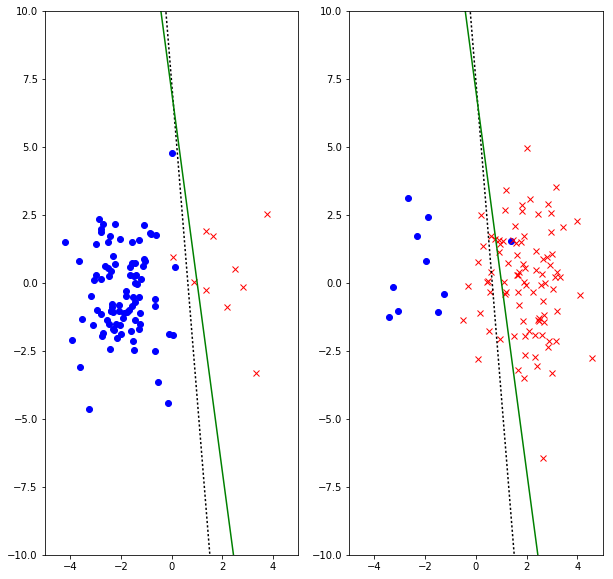

In [75]:
main()

Epoch 0:
   w1: 0.000000e+00
   w2: 0.000000e+00

Epoch 200:
   w1: -5.350351e-01
   w2: 3.071782e-02

Epoch 400:
   w1: -5.099428e-01
   w2: 4.516246e-02

Finally:
   w1: -4.628018e-01
   w2: 3.123019e-02
   b: 0.168720

Epoch 0:
   w1: -4.628018e-01
   w2: 3.123019e-02

Epoch 200:
   w1: -3.253035e-01
   w2: 1.391437e-02

Epoch 400:
   w1: -3.253035e-01
   w2: 1.391437e-02

Finally:
   w1: -3.253035e-01
   w2: 1.391437e-02
   b: 0.184408



/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


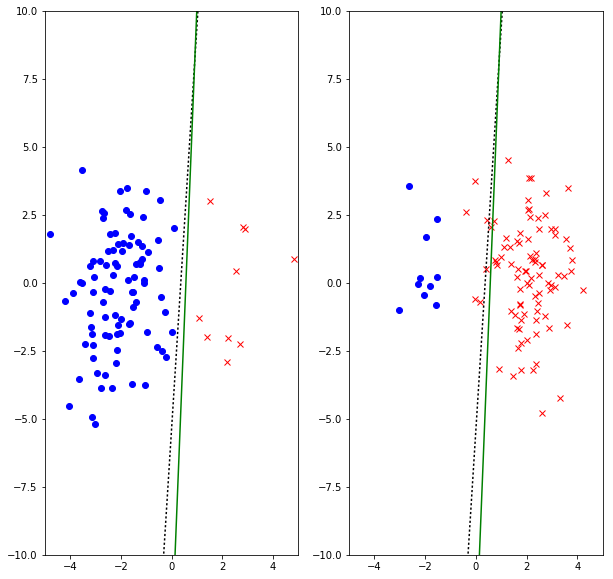

In [79]:
main()